# Image classification: dogs & cats

In [ ]:
# Handle imports up-front
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image


## 1. Data preparation

### 1.1. Load the data paths

In [2]:
# Set the path to the training data
training_data_path='../data/train'

# Get a list of training dog and cat images
training_dogs=glob.glob(f'{training_data_path}/dog/dog.*')
training_cats=glob.glob(f'{training_data_path}/cat/cat.*')

### 1.2. Inspect

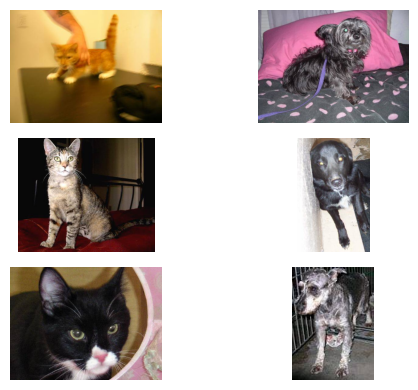

In [3]:
fig, axs = plt.subplots(3,2,figsize=(6, 4))

for cat, dog, row in zip(training_cats, training_dogs, axs):
    for animal, ax in zip([cat, dog], row):
        animal=image.load_img(animal)
        animal=image.img_to_array(animal)
        animal/=255.0
        ax.imshow(animal)
        ax.axis('off')

plt.tight_layout()
plt.show()

## 2. EDA

Let's take a look at a few of our images to get a feel for how image data is structured.

### 2.1. Image data

In [4]:
# Load one of the images as an array and look at it's shape - what do you see, what are the dimensions? Are they what you expect?

In [5]:
# Plot a histogram of the three 2D arrays which comprise the image. What do you see?

### 2.2. Image dimensions

Let's take a look at a random sample of images from the dataset and see what their dimensions are.

In [6]:
# Loop over a few hundred images and extract their width and heigh, plot both as a histogram. What do you see, does this information matter to us, if so, how?

### 2.3. Image aspect ratios

In [7]:
# Plot a histogram of the image aspect ratios (i.e. width/height) What do you see, does this information matter to us, if so, how?

## 3. Build the model

### 3.1. Prepare images for streaming

In [8]:
def make_datasets(training_data_path: str, image_dim: int, batch_size: int=16):

    training_dataset=tf.keras.utils.image_dataset_from_directory(
        training_data_path,
        validation_split=0.2,
        subset='training',
        seed=315,
        image_size=(image_dim, image_dim),
        batch_size=batch_size
    ).repeat()

    validation_dataset=tf.keras.utils.image_dataset_from_directory(
        training_data_path,
        validation_split=0.2,
        subset='validation',
        seed=315,
        image_size=(image_dim, image_dim),
        batch_size=batch_size
    ).repeat()

    return training_dataset, validation_dataset

training_dataset, validation_dataset=make_datasets(training_data_path, 128)

### 3.1. Model definition

In [9]:
def compile_model(image_dim, learning_rate):

    initializer=tf.keras.initializers.GlorotUniform(seed=315)

    model=Sequential([
        layers.Input((image_dim, image_dim, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer=initializer),
        layers.Dense(1, activation='sigmoid', kernel_initializer=initializer)
    ])

    optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

    return model

model=compile_model(128, 0.001)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

### 3.2. Model training

In [10]:
training_results=model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=5
)

Epoch 1/10
5/5 [==============================] - 2s 131ms/step - loss: 0.8371 - binary_accuracy: 0.4500 - val_loss: 0.7030 - val_binary_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 76ms/step - loss: 0.6976 - binary_accuracy: 0.4750 - val_loss: 0.6930 - val_binary_accuracy: 0.5625
Epoch 3/10
5/5 [==============================] - 0s 74ms/step - loss: 0.6861 - binary_accuracy: 0.6125 - val_loss: 0.7129 - val_binary_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 0s 76ms/step - loss: 0.7052 - binary_accuracy: 0.4625 - val_loss: 0.7049 - val_binary_accuracy: 0.4500
Epoch 5/10
5/5 [==============================] - 0s 75ms/step - loss: 0.6998 - binary_accuracy: 0.4625 - val_loss: 0.6963 - val_binary_accuracy: 0.3750
Epoch 6/10
5/5 [==============================] - 0s 75ms/step - loss: 0.6932 - binary_accuracy: 0.4500 - val_loss: 0.6944 - val_binary_accuracy: 0.4375
Epoch 7/10
5/5 [==============================] - 0s 73ms/step - loss: 0.6896 - b

In [11]:
# Take a look at what information 'training_results' contains. Plot the training and validation accuracy (and binary cross-entropy if you like) over the training epoch. Is the model learning? If not, what do you think is wrong?

### 3.3. Model optimization

In [12]:
# Try optimizing the learning rate and the batch size using a few values near the default settings. Hint: use a loop!

In [13]:
# Pick the best values for learning rate and batch size and train the model for longer

## 4. Evaluate the model

In [14]:
# Test the model out on the test data - is it as good as you expected, given the training data? Worse? Better? Why?